# Data Aggregation and Group Operations
p345

In [1]:
import numpy as np
import pandas as pd

In [ ]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20

In [2]:
np.random.seed(12345)

In [2]:
import matplotlib.pyplot as plt

In [3]:
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [6]:
%matplotlib inline

## GroupBy Mechanics

In [12]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,1.239695,-0.109786,a,one
1,-0.737723,0.031947,a,two
2,-1.167250,-0.867356,b,one
3,1.449556,1.037156,b,two
4,2.164399,1.047967,a,one


##### groupby객체 만으로는 아무것도 안 뜸 ㅇㅇ

In [19]:
#key1기준으로 본 data1. groupby 객체
grouped = df['data1'].groupby(df['key1'])
grouped

In [22]:
dict(list(grouped))

{'a': 0    1.239695
1   -0.737723
4    2.164399
Name: data1, dtype: float64, 'b': 2   -1.167250
3    1.449556
Name: data1, dtype: float64}


In [20]:
# groupby 객체에서 평균값
grouped.mean()

key1
a    0.746672
b   -0.537585
Name: data1, dtype: float64

In [21]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.880536
      two     0.478943
b     one    -0.519439
      two    -0.555730
Name: data1, dtype: float64

In [22]:
type(means)

pandas.core.series.Series

In [30]:
# import pandas as pd

In [53]:
means.unstack()

key2,one,two
key1,,
a,0.880536,0.478943
b,-0.519439,-0.555730


In [ ]:
means.unstack()

In [ ]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

In [ ]:
df.groupby('key1').mean()
df.groupby(['key1', 'key2']).mean()

In [ ]:
df.groupby(['key1', 'key2']).size()

### Iterating Over Groups

In [14]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
1  0.478943  0.092908    a  two
4  1.965781  1.246435    a  one
b
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
3 -0.555730  0.769023    b  two


In [15]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0 -0.204708  1.393406    a  one
4  1.965781  1.246435    a  one
('a', 'two')
      data1     data2 key1 key2
1  0.478943  0.092908    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.519439  0.281746    b  one
('b', 'two')
     data1     data2 key1 key2
3 -0.55573  0.769023    b  two


In [18]:
pieces = dict(list(df.groupby('key1')))
pieces['b']
# pieces

,data1,data2,key1,key2
2,-0.519439,0.281746,b,one
3,-0.555730,0.769023,b,two


In [55]:
df.dtypes
grouped = df.groupby(df.dtypes, axis=1)

In [56]:
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0 -0.204708  1.393406
1  0.478943  0.092908
2 -0.519439  0.281746
3 -0.555730  0.769023
4  1.965781  1.246435
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Selecting a Column or Subset of Columns

df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [57]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   1.319920
     two   0.092908
b    one   0.281746
     two   0.769023

In [58]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

### Grouping with Dicts and Series

In [59]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,1.007189,-1.296221,0.274992,0.228913,1.352917
Steve,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Wes,-0.539741,NaN,NaN,-1.021228,-0.577087
Jim,0.124121,0.302614,0.523772,0.000940,1.343810
Travis,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [61]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red'}

In [62]:
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,0.503905,1.063885
Steve,1.297183,-1.553778
Wes,-1.021228,-1.116829
Jim,0.524712,1.770545
Travis,-4.230992,-2.405455


In [63]:
map_series = pd.Series(mapping)
map_series
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Grouping with Functions

In [ ]:
people.groupby(len).sum()

In [ ]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

### Grouping by Index Levels

In [ ]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

## Data Aggregation

In [26]:
df

,data1,data2,key1,key2
0,1.239695,-0.109786,a,one
1,-0.737723,0.031947,a,two
2,-1.167250,-0.867356,b,one
3,1.449556,1.037156,b,two
4,2.164399,1.047967,a,one


In [27]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.979458
b    1.187875
Name: data1, dtype: float64

In [29]:
dict(list(grouped))

{'a':       data1     data2 key1 key2
0  1.239695 -0.109786    a  one
1 -0.737723  0.031947    a  two
4  2.164399  1.047967    a  one, 'b':       data1     data2 key1 key2
2 -1.167250 -0.867356    b  one
3  1.449556  1.037156    b  two}

In [15]:
df.groupby('key1')['data1'].quantile(0.9)

### agg는 max, min가능한 숫자만 알아서 연산
그래서 grouped에서 칼럼만 골라내지 않고, 통째로 넣어도 잘 되는 것

In [43]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.902122,1.157753
b,2.616806,1.904513


In [30]:
grouped['data1'].agg(peak_to_peak)

key1
a    2.902122
b    2.616806
Name: data1, dtype: float64

In [31]:
grouped['data1'].apply(peak_to_peak)

key1
a    2.902122
b    2.616806
Name: data1, dtype: float64

In [ ]:
grouped.describe()

### .apply(fct) 는 골라 넣어주지 않으면 에러!
인자에 숫자만 와야 함
> if not,  unsupported operand type(s) for -: 'float' and 'str'

In [17]:
df.groupby('key1')['data1'].apply(peak_to_peak)

key1
a    2.902122
b    2.616806
Name: data1, dtype: float64

In [18]:
df.groupby('key1').apply(peak_to_peak)

TypeError: unsupported operand type(s) for -: 'float' and 'str'

### Column-Wise and Multiple Function Application

#### groupby객체.agg([fct1, fct2, ...])

In [49]:
tips = pd.read_csv('examples/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [50]:
grouped = tips.groupby(['day', 'smoker'])

In [51]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [37]:
grouped.agg([peak_to_peak])

,data1,data2
,peak_to_peak,peak_to_peak
key1,,
a,2.902122,1.157753
b,2.616806,1.904513


In [42]:
grouped.agg([('최솟',min), 'mean', ('픽2픽',peak_to_peak)])

data1                         data2                    
            최솟      mean       픽2픽        최솟      mean       픽2픽
key1                                                            
a    -0.737723  0.888790  2.902122 -0.109786  0.323376  1.157753
b    -1.167250  0.141153  2.616806 -0.867356  0.084900  1.904513

In [47]:
grouped.agg([('최댓',max), 'mean', 'count'])

data1                     data2                
            최댓      mean count        최댓      mean count
key1                                                    
a     2.164399  0.888790     3  1.047967  0.323376     3
b     1.449556  0.141153     2  1.037156  0.084900     2

In [52]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [53]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [54]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [55]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

##### 차피 (칼럼,fct)할거, 깔끔히 list로
p361

In [57]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

<class 'list'>


tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [58]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### Returning Aggregated Data Without Row Indexes
p362

In [60]:
tips.groupby(['day', 'smoker'], as_index=True).mean()

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [427]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## data.groupby(key).transform(fct)
p364

In [436]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,-0.165275,2.608034,-0.173721,1.543488,0.005439
Steve,1.122628,0.356349,-0.260007,-0.248941,0.969121
Wes,0.953721,NaN,NaN,-0.274360,0.350032
Jim,1.479273,-0.085289,0.855879,-1.201002,0.601366
Travis,0.639231,0.148032,0.832724,1.295909,-0.212503


In [437]:
key= ['one','two','one','two','one']

In [438]:
people.groupby(key).mean()

,a,b,c,d,e
one,0.475892,1.378033,0.329502,0.855012,0.047656
two,1.300951,0.135530,0.297936,-0.724972,0.785244


In [439]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,0.475892,1.378033,0.329502,0.855012,0.047656
Steve,1.300951,0.135530,0.297936,-0.724972,0.785244
Wes,0.475892,1.378033,0.329502,0.855012,0.047656
Jim,1.300951,0.135530,0.297936,-0.724972,0.785244
Travis,0.475892,1.378033,0.329502,0.855012,0.047656


#### 평균값을 빼고 싶다면
뭔소리??

In [440]:
def demean(arr):
    return arr-arr.mean()

In [441]:
demeaned= people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,-0.641167,1.230001,-0.503223,0.688476,-0.042217
Steve,-0.178323,0.220819,-0.557943,0.476030,0.183878
Wes,0.477828,NaN,NaN,-1.129372,0.302376
Jim,0.178323,-0.220819,0.557943,-0.476030,-0.183878
Travis,0.163339,-1.230001,0.503223,0.440897,-0.260159


In [442]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,-3.700743e-17,0.000000e+00,0.0,-7.401487e-17,0.0
two,-1.110223e-16,-1.387779e-17,0.0,0.000000e+00,0.0


In [451]:
!start .

In [449]:
# %save result/transform.py 436-442

## Apply: General split-apply-combine
p365

In [10]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=16)

,total_bill,tip,smoker,day,time,size,tip_pct
214,28.17,6.50,Yes,Sat,Dinner,3,0.230742
88,24.71,5.85,No,Thur,Lunch,2,0.236746
174,16.82,4.00,Yes,Sun,Dinner,2,0.237812
194,16.58,4.00,Yes,Thur,Lunch,2,0.241255
185,20.69,5.00,No,Sun,Dinner,5,0.241663
181,23.33,5.65,Yes,Sun,Dinner,2,0.242177
51,10.29,2.60,No,Sun,Dinner,2,0.252672
221,13.42,3.48,Yes,Fri,Lunch,2,0.259314
93,16.32,4.30,Yes,Fri,Dinner,2,0.263480
149,7.51,2.00,No,Thur,Lunch,2,0.266312


In [9]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

> apply에 넘기는 함수에 인자를 여럿 넘기는 경우

#### data...apply(fct, param2, param3, ...)

In [452]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
            91        22.49   3.50     No   Fri  Dinner     2  0.155625
            223       15.98   3.00     No   Fri   Lunch     3  0.187735
            99        12.46   1.50     No   Fri  Dinner     2  0.120385
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
            59        48.27   6.73     No   Sat  Dinner     4  0.139424
            23        39.42   7.58     No   Sat  Dinner     4  0.192288
            238       35.83   4.67     No   Sat  Dinner     3  0.130338
            39        31.27   5.00     No   Sat  Dinner     3  0.159898
            239       29.03   5.92     No   Sat  Dinner     3  0.203927
            57        26.41   1.50     No   Sat  Dinner     2  0.056797
            35        24.06   3.60     No   Sat  Dinner     3  0.149626
            28        21.70   4.30     No   Sat  Dinner     2  0.198157
            104       20.92   4.08     No   Sat  Dinner     2  0.195029
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
            112       38.07   4.00     No   Sun  Dinner     3  0.105070
            11        35.26   5.00     No   Sun  Dinner     4  0.141804
            52        34.81   5.20     No   Sun  Dinner     4  0.149382
            47        32.40   6.00     No   Sun  Dinner     4  0.185185
            167       31.71   4.50     No   Sun  Dinner     4  0.141911
            44        30.40   5.60     No   Sun  Dinner     4  0.184211
            116       29.93   5.07     No   Sun  Dinner     4  0.169395
            155       29.85   5.14     No   Sun  Dinner     5  0.172194
            48        28.55   2.05     No   Sun  Dinner     3  0.071804
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
            85        34.83   5.17     No  Thur   Lunch     4  0.148435
            141       34.30   6.70     No  Thur   Lunch     6  0.195335
            125       29.80   4.20     No  Thur   Lunch     6  0.140940
            77        27.20   4.00     No  Thur   Lunch     4  0.147059
            143       27.05   5.00     No  Thur   Lunch     6  0.184843
...                     ...    ...    ...   ...     ...   ...       ...
Yes    Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
            102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
            207       38.73   3.00    Yes   Sat  Dinner     4  0.077459
            56        38.01   3.00    Yes   Sat  Dinner     4  0.078927
            237       32.83   1.17    Yes   Sat  Dinner     2  0.035638
            219       30.14   3.09    Yes   Sat  Dinner     4  0.102522
            210       30.06   2.00    Yes   Sat  Dinner     3  0.066534
            214       28.17   6.50    Yes   Sat  Dinner     3  0.230742
            216       28.15   3.00    Yes   Sat  Dinner     5  0.106572
            240       27.18   2.00    Yes   Sat  Dinner     2  0.073584
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
            184       40.55   3.00    Yes   Sun  Dinner     2  0.073983
            180       34.65   3.68    Yes   Sun  Dinner     4  0.106205
            179       34.63   3.55    Yes   Sun  Dinner     2  0.102512
            175       32.90   3.11    Yes   Sun  Dinner     2  0.094529
            173       31.85   3.18    Yes   Sun  Dinner     2  0.099843
            187       30.46   2.00    Yes   Sun  Dinner     5  0.065660
            181       23.33   5.65    Yes   Sun  Dinner     2  0.242177
            183       23.17   6.50    Yes   Sun  Dinner     4  0.280535
            189       23.10   4.00    Yes   Sun  Dinner     3  0.173160
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982
            83        32.68   5.00    Yes  Thur   Lunch     2  0.152999
            192       28.44   2.56    Yes  Thur   Lunch  

In [458]:
result = tips.groupby('smoker')['tip_pct'].describe()
result
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

f = lambda x: x.describe()
grouped.apply(f)

### Suppressing the Group Keys
groupby 그룹이름을 index로 만들지 않음. group_keys=False

In [461]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
# top(tips, n=16)

In [462]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [465]:
tips.groupby('smoker', group_keys=True).apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

### Quantile and Bucket Analysis
#### 변위치 분석과 버킷분석
p368

In [ ]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

In [ ]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

### Example: Filling Missing Values with Group-Specific       Values

In [ ]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s
s.fillna(s.mean())

In [ ]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
data

In [ ]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data
data.groupby(group_key).mean()

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

In [ ]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

### Example: Random Sampling and Permutation

In [ ]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [ ]:
deck[:13]

In [ ]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

In [ ]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

In [ ]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

### Example: Group Weighted Average and Correlation

In [ ]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df

In [ ]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()
close_px[-4:]

In [ ]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [ ]:
rets = close_px.pct_change().dropna()

In [ ]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

In [ ]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### Example: Group-Wise Linear Regression

In [ ]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

## Pivot Tables and Cross-Tabulation

In [ ]:
tips.pivot_table(index=['day', 'smoker'])

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

In [ ]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

In [ ]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

### Cross-Tabulations: Crosstab

In [ ]:
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')

In [ ]:
data

In [ ]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion

## 예제: subway1
1. 각 노선번호 별 승차와 하차의 합 구하기
2. 각 노선번호별 시간에 따른 승차에 대한 증가추이와, 하차에 대한 증가추이를 하나의 피겨에 각각 생성
3. 지하철 운영 회사별 승하차에 대한 평균값 구하기
  ** 서울메트로(2,4호선), 코레일(1,3호선), 도시철도공사(5,6,7,8)!

In [84]:
from pandas import Series, DataFrame
import pandas as pd

In [72]:
# %cd data
# %cd dataAnal_py_basic/pandas
# %cd ..

E:\github\dataAnal_py_basic\pandas


In [88]:
subway= pd.read_csv('data/subway.csv', encoding='cp949')#, nrows=2)
subway.head(3)

,노선번호,시간,승차,하차
0,line_1,506,88136,35394
1,line_1,607,114628,195028
2,line_1,708,259282,483162


In [95]:
# subway= pd.read_csv('data/subway.csv', encoding='cp949'
#                    ,parse_dates=["시간"])
# subway.head(3)

,노선번호,시간,승차,하차
0,line_1,506,88136,35394
1,line_1,607,114628,195028
2,line_1,708,259282,483162


In [96]:
# type(subway['시간'])

pandas.core.series.Series

### 1

### df [[ ]]. groupby( df [ ] )

In [11]:
sub1ab= subway[['승차','하차']].groupby(subway['노선번호'])

In [12]:
sub1ab.sum()

,승차,하차
노선번호,,
line_1,9666934,9430846
line_2,47393885,47983161
line_3,16484269,16555337
line_4,19810776,20053934
line_5,10529597,10650666
line_6,19810776,20053934
line_7,19572699,20642314
line_8,18924212,17843163


In [14]:
sub1ab.sum().sort_values('승차', ascending=False)

,승차,하차
노선번호,,
line_2,47393885,47983161
line_4,19810776,20053934
line_6,19810776,20053934
line_7,19572699,20642314
line_8,18924212,17843163
line_3,16484269,16555337
line_5,10529597,10650666
line_1,9666934,9430846


### 2

#### groupby는 당장 뭘 보는 용도로만 쓰고
이것 갖고 딴짓 할 생각 ㄴㄴ. 하려면 df 만들고 하던가

In [95]:
import matplotlib.pyplot as plt

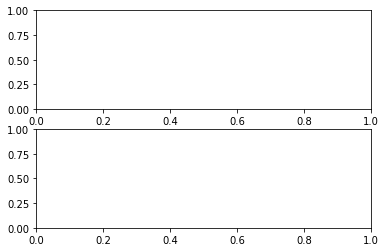

In [126]:
fig, axes= plt.subplots(2,1)

In [94]:
sub1t_on= subway[['승차','시간']].groupby(subway['노선번호'])
sub1t_off= subway[['하차','시간']].groupby(subway['노선번호'])

In [153]:
subDicOn= dict(list(sub1t_on))
subDicOff= dict(list(sub1t_off))

In [111]:
dict(list(sub1t_on))['line_1'].head(3)

,승차,시간
0,88136,506
1,114628,607
2,259282,708


In [121]:
dict(list(sub1t_on)).keys()

dict_keys(['line_1', 'line_2', 'line_3', 'line_4', 'line_5', 'line_6', 'line_7', 'line_8'])

In [101]:
type(dict(list(sub1t_on))['line_1'])

pandas.core.frame.DataFrame

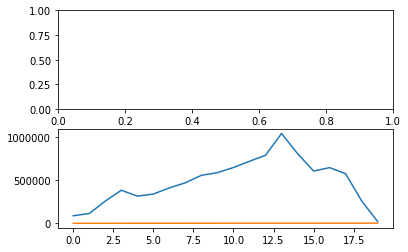

In [148]:
axes[1].plot(dict(list(sub1t_on))['line_1'])
fig

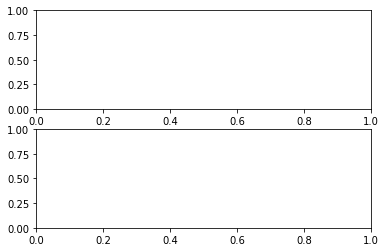

In [154]:
fig.clear()
fig, axes= plt.subplots(2,1)

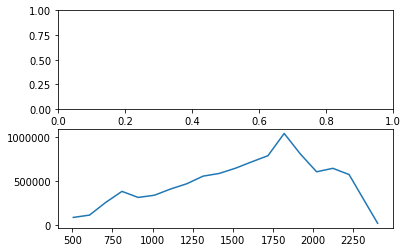

In [150]:
axes[1].plot(dict(list(sub1t_on))['line_1'].set_index('시간'))
fig

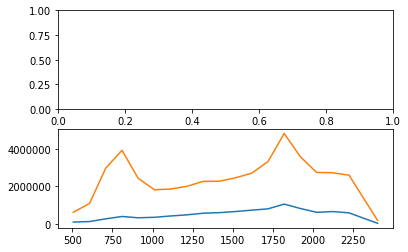

In [151]:
axes[1].plot(dict(list(sub1t_on))['line_2'].set_index('시간'))
fig

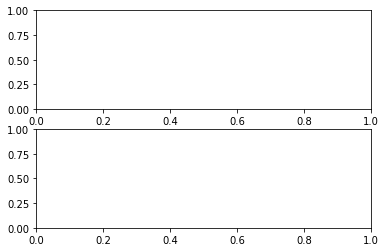

In [163]:
fig.clear()
fig, axes= plt.subplots(2,1)

In [164]:
list(subDicOn.keys())[0]

'line_1'

subDicOn= dict(list(sub1t_on)), 
subDicOff= dict(list(sub1t_off))

axes[1].plot(dict(list(sub1t_on))['line_2'].set_index('시간'))
fig

In [165]:
lines= list(subDicOn.keys())

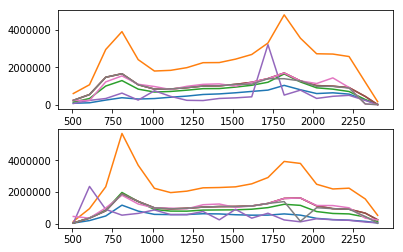

In [166]:
for line in lines:
    axes[0].plot(subDicOn[line].set_index('시간'))
    axes[1].plot(subDicOff[line].set_index('시간'))
fig

### 위 방법의 문제점: 복잡하기도 하고, 범례가 알아서 안 그려진다
plot은 어차피 정보 3개만 있으면 되니, pivot으로 하자

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
subway= pd.read_csv('data/subway.csv', encoding='cp949')#, nrows=2)
subway.head(3)

,노선번호,시간,승차,하차
0,line_1,506,88136,35394
1,line_1,607,114628,195028
2,line_1,708,259282,483162


In [27]:
subway.columns

Index(['노선번호', '시간', '승차', '하차'], dtype='object')

In [57]:
subP_on= subway.pivot('노선번호','시간','승차')

In [59]:
subP_on

시간,506,607,708,809,910,1011,1112,1213,1314,1415,1516,1617,1718,1819,1920,2021,2122,2223,2324,2401
노선번호,,,,,,,,,,,,,,,,,,,,
line_1,88136,114628,259282,384892,315797,340972,411897,471989,558377,589343,648960,721442,791417,1044776,810482,608066,647624,576958,260729,21167
line_2,608841,1079186,2960789,3914929,2419350,1810982,1847789,1990964,2256231,2263081,2445765,2694321,3306132,4810661,3565184,2732977,2716860,2584664,1212806,172373
line_3,149909,344768,1008133,1301035,843939,688982,719544,788290,870152,874658,952321,1050130,1212098,1656305,1227847,913682,842636,717158,288744,33938
line_4,244178,555232,1478641,1666148,1080607,845377,853473,921995,1010356,1021972,1099173,1208057,1405470,1705617,1282398,1034818,1001286,925633,452658,17687
line_5,76867,243242,343245,632422,259342,756756,456456,246547,234566,345677,378521,434244,3221111,526335,790482,348066,460624,512958,240789,21347
line_6,244178,555232,1478641,1666148,1080607,845377,853473,921995,1010356,1021972,1099173,1208057,1405470,1705617,1282398,1034818,1001286,925633,452658,17687
line_7,239566,234900,1230585,1549555,1103944,983724,823479,994384,1099837,1123884,999348,1208057,1405470,1705617,1282398,1143244,1444442,932454,45466,22345
line_8,244178,555232,1478641,1666148,1080607,845377,853473,921995,1010356,1021972,1099173,1108057,1399470,1400317,1282398,994385,992340,903243,54356,12494


In [28]:
subP_on_T= subway.pivot('노선번호','시간','승차').T
subP_off_T= subway.pivot('노선번호','시간','하차').T

### 시간이 행, 범례 대상이 컬럼으로 되어야!

In [75]:
subP_on_T.head(3)

노선번호,line_1,line_2,line_3,line_4,line_5,line_6,line_7,line_8
시간,,,,,,,,
506,88136,608841,149909,244178,76867,244178,239566,244178
607,114628,1079186,344768,555232,243242,555232,234900,555232
708,259282,2960789,1008133,1478641,343245,1478641,1230585,1478641


In [80]:
# pd.to_datetime(subP_on_T.index)
type(subP_on_T.index)

pandas.core.indexes.numeric.Int64Index

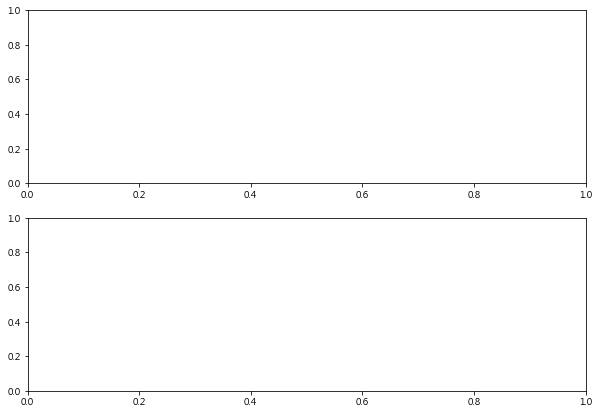

In [140]:
fig.clear('all')
fig, axes= plt.subplots(2,1)
fig.set_size_inches(10,7)

In [141]:
#ㄴㄴ plt.rc('fig',figsize=(8,10))
plt.rc('font', family='Malgun Gothic')
plt.rc('legend', fontsize=10)

In [73]:
# subP_on_T.plot(ax=axes[0])
# subP_off_T.plot(ax=axes[1])
# fig

#### x축 hour, min을 좀더 알아보기 쉽게 바꾸고픔
05:30 ~ 12:30

### 일단 눈금 바꾸는 방법부터?
- p315
- axex[0].set_xticks

In [93]:
# subP_on_T.plot?

In [92]:
# ff= lambda x: ""
subP_on_T.index

Int64Index([ 506,  607,  708,  809,  910, 1011, 1112, 1213, 1314, 1415, 1516,
            1617, 1718, 1819, 1920, 2021, 2122, 2223, 2324, 2401],
           dtype='int64', name='시간')

In [145]:
indN= ["%02d:%02d"%(i,j) for i,j in zip(range(5,25),range(6,25))]
indN.append('24:01')
indN

['05:06',
 '06:07',
 '07:08',
 '08:09',
 '09:10',
 '10:11',
 '11:12',
 '12:13',
 '13:14',
 '14:15',
 '15:16',
 '16:17',
 '17:18',
 '18:19',
 '19:20',
 '20:21',
 '21:22',
 '22:23',
 '23:24',
 '24:01']

In [150]:
type(indN)

list

In [149]:
# int64index(indN)

NameError: name 'int64index' is not defined

In [91]:
#인자가 숫자라 안됨 re.sub(subP_on_T.index,'\d{2}$','')

In [153]:
type(xtick1)

pandas.core.indexes.numeric.Int64Index

In [154]:
# 실행할때마다 범례가 늘어나는 에러가 있음. clear 해줘야!
subP_on_T.plot(ax=axes[0], xticks= xtick1)#, figsize=(8,10))
subP_off_T.plot(ax=axes[1])#, figsize=(8,10))#, xticks= indN)
fig

AttributeError: 'NoneType' object has no attribute 'seq'

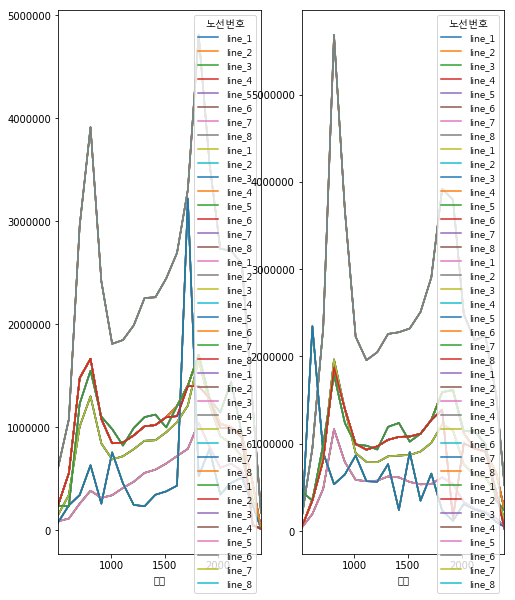

In [54]:
axes[0].plot(subP_on_T)
axes[1].plot(subP_off_T)
fig

### seaborn으로도 해보자

In [98]:
import seaborn as sns

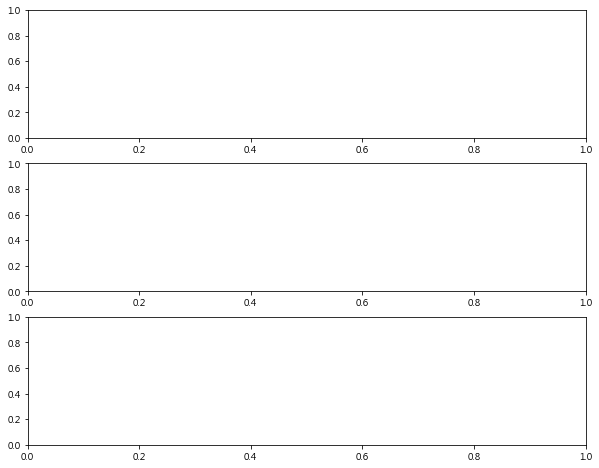

In [135]:
fig, axes= plt.subplots(3,1)
fig.set_size_inches(10,8)

In [119]:
subway.head(3)

,노선번호,시간,승차,하차
0,line_1,506,88136,35394
1,line_1,607,114628,195028
2,line_1,708,259282,483162


In [124]:
%matplotlib inline

In [129]:
sns.barplot(data=subway, x="시간",y="승차", ax=axes[0])

In [133]:
sns.pointplot(data=subway, x='시간', y='승차', ax=axes[1])

In [136]:
axes[2].plot(subway, x='')

In [138]:
axes[2].plot?

Object `plot` not found.


In [ ]:
axes[2].plot

#### sns.barplot?
인자 순서가 x, y, hue, data, ... 라서 명시해줘야 제대로 먹힘

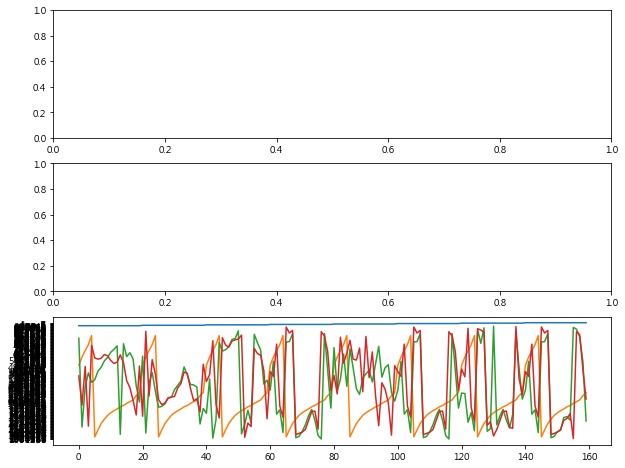

In [137]:
fig

In [131]:
pd.MultiIndex?

## 예제: subway2
1. 각 시간대 별 승차와 합차의 평균과 합을 나타내세요
2. 각 역별 전체 승차와 합차의 평균과 합을 나타내세요
3. 각 시간대 별 승차수가 가장 높은 역을 나타내세요
4. 승차가 가장 많은 top 10개의 역을 구하고 각 역의 시간대별 승차의 증감추세를 도표화 하여라
5. 각 역별 마지막 시간(24~01) 승차수와 첫시간(05~06) 승차수의 차이를 구하여라.

In [62]:
!start .

In [82]:
xls_file= pd.ExcelFile('data/subway2.xlsx')
# xls_file.sheet_names[0]
subwayy= xls_file.parse(xls_file.sheet_names[0], skiprows=1)

In [116]:
subwayy

,전체,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~01
0,서울역(1),승차,17465,18434,50313,93398,78705,86342,93585,97707,...,93849,122597,142272,207172,156209,108909,116350,88902,49049,4558
1,NaN,하차,7829,48553,110250,233852,121983,79628,75577,70984,...,79592,84211,91308,98175,81918,65388,59285,50266,32182,13943
2,시 청(1),승차,2993,4473,7633,10404,13328,16953,25467,27265,...,48352,52182,63118,117857,85833,74034,85680,69327,24653,1691
3,NaN,하차,4142,19730,67995,175458,83777,48363,47519,42646,...,38720,36738,37284,45942,43780,25171,14515,8552,5349,1603
4,종 각,승차,7371,7836,14545,24578,23691,32290,47470,57187,...,87480,96491,115106,188578,156569,138406,176800,182774,86306,6074
5,NaN,하차,4861,29757,93579,245221,153933,88680,83402,78253,...,71320,75733,91056,121063,106523,49591,27783,18249,10439,2429
6,종로3(1),승차,7683,6733,11103,20647,20878,32775,46390,62213,...,109496,117960,122073,138037,124621,87746,99388,93874,43373,4284
7,NaN,하차,2119,18872,34622,103951,110831,95839,93370,97363,...,91369,77952,72634,84674,77413,35839,18949,12579,8339,4016
8,종로5가,승차,3159,4416,8070,12328,16909,24445,34454,43485,...,72147,78378,87662,112569,83818,51502,46205,35584,14442,1047
9,NaN,하차,2977,14274,51907,127936,93821,67136,63338,61557,...,52270,44883,39772,39299,27538,13731,10187,8500,5253,1550


In [134]:
subwayy= subwayy.fillna(method='ffill')
subwayy

,전체,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~01
0,서울역(1),승차,17465,18434,50313,93398,78705,86342,93585,97707,...,93849,122597,142272,207172,156209,108909,116350,88902,49049,4558
1,서울역(1),하차,7829,48553,110250,233852,121983,79628,75577,70984,...,79592,84211,91308,98175,81918,65388,59285,50266,32182,13943
2,시 청(1),승차,2993,4473,7633,10404,13328,16953,25467,27265,...,48352,52182,63118,117857,85833,74034,85680,69327,24653,1691
3,시 청(1),하차,4142,19730,67995,175458,83777,48363,47519,42646,...,38720,36738,37284,45942,43780,25171,14515,8552,5349,1603
4,종 각,승차,7371,7836,14545,24578,23691,32290,47470,57187,...,87480,96491,115106,188578,156569,138406,176800,182774,86306,6074
5,종 각,하차,4861,29757,93579,245221,153933,88680,83402,78253,...,71320,75733,91056,121063,106523,49591,27783,18249,10439,2429
6,종로3(1),승차,7683,6733,11103,20647,20878,32775,46390,62213,...,109496,117960,122073,138037,124621,87746,99388,93874,43373,4284
7,종로3(1),하차,2119,18872,34622,103951,110831,95839,93370,97363,...,91369,77952,72634,84674,77413,35839,18949,12579,8339,4016
8,종로5가,승차,3159,4416,8070,12328,16909,24445,34454,43485,...,72147,78378,87662,112569,83818,51502,46205,35584,14442,1047
9,종로5가,하차,2977,14274,51907,127936,93821,67136,63338,61557,...,52270,44883,39772,39299,27538,13731,10187,8500,5253,1550


In [138]:
#df.set_index(['year', 'month'])
subwayy.set_index(['전체', '구분'])

05~06  06~07   07~08   08~09   09~10  10~11  11~12  12~13   13~14  \
전체     구분                                                                      
서울역(1) 승차  17465  18434   50313   93398   78705  86342  93585  97707  102608   
       하차   7829  48553  110250  233852  121983  79628  75577  70984   80388   
시 청(1) 승차   2993   4473    7633   10404   13328  16953  25467  27265   36393   
       하차   4142  19730   67995  175458   83777  48363  47519  42646   45465   
종 각    승차   7371   7836   14545   24578   23691  32290  47470  57187   76131   
       하차   4861  29757   93579  245221  153933  88680  83402  78253   84694   
종로3(1) 승차   7683   6733   11103   20647   20878  32775  46390  62213   79812   
       하차   2119  18872   34622  103951  110831  95839  93370  97363  106736   
종로5가   승차   3159   4416    8070   12328   16909  24445  34454  43485   56337   
       하차   2977  14274   51907  127936   93821  67136  63338  61557   63166   
동대문    승차  13570  14955   28139   32650   28878  25619  25431  30289   33404   
       하차   3176  11703   18818   41963   39519  38817  42117  45097   45292   
신설동(1) 승차   7379  11384   24936   33848   24614  22337  25357  29247   32778   
       하차   1991   9248   33809   77567   52622  33818  29901  31321   33285   
제기동    승차   5432  10675   25372   32579   26940  28781  34569  39531   46276   
       하차   2562  14188   21419   53022   39372  44734  47875  53633   58264   
청량리    승차  20318  32688   83208  117006   75323  65009  70401  71667   78177   
       하차   5307  24967   41351   72675   74262  74185  72502  77895   86168   
동묘앞    승차   2779   3034    5963    7454    6531   6421   8773  13398   16461   
       하차    430   3736    9412   34058   21584  14559  14944  18318   21588   
시 청(2) 승차   2035   3074    8395   11645   14225  18935  26720  26947   34564   
       하차   1776  17387   97659  216553   81613  40417  38851  35886   41671   
을지입구   승차   2466   2358    5710    9584   15440  21197  32455  39058   59700   
       하차   1832  19798   95314  301554  161928  78929  79215  78458   84275   
을지3(2) 승차   1029   2127    4082    6641    9357  12763  15863  18037   22419   
       하차   1034  11296   39207  116054   64935  35232  27715  22540   25083   
을지4가   승차    896   2015    3572    5919    9319  12726  16408  19145   23808   
       하차    961   8790   26713   93562   59011  33157  29525  25108   24848   
동운(2)  승차   9832   9164   11435   15277   15174  16376  20760  26390   30351   
       하차    933  11717   28801   67006   38118  37690  39403  41140   47159   
...          ...    ...     ...     ...     ...    ...    ...    ...     ...   
혜 화    승차   8005  12474   23966   32789   30078  35675  45545  53687   62295   
       하차   2290  19882   62504  132271  119734  87539  73473  84916  100558   
동대문(4) 승차   9310   7986    8221   12079   17372  25519  33745  40287   50976   
       하차   1978  20057   57357  106973   90016  68208  58306  51652   52458   
동운(4)  승차   9842  10165   10808   13114   13620  14582  20168  24960   32868   
       하차   1399  14448   26314   76158   52944  44263  40325  41603   46757   
충무로    승차   4315   6134   12046   19378   23025  25805  33119  38350   49987   
       하차   2590  21882   66441  256759  153897  82629  64220  57855   60923   
명 동    승차   1299   2458    4511    7598   13222  17568  25781  33864   45213   
       하차   1072  17662   54675  155827  118988  79032  73688  85987   97166   
회 현    승차   4074   6357   10229   14269   18009  24895  38682  54125   70701   
       하차   1663  25894   57322  161902  135213  85434  92971  86007   79917   
서울역(4) 승차   3044   4219    7803   13936   11492  11342  12434  12329   13101   
       하차    905  14106   28385   59567   35804  24805  24133  24750   29806   
숙 대    승차   6120  11212   27701   39447   26357  21873  24197  26399   31520   
       하차   1255  11777   35835   88771   48736  36972  28704  29820   28606   
삼각지    승차    842   2094    5724    8746    6646   5414   5875   7871    9804   
       하차  

### 1

In [139]:
subwayy.groupby('구분').agg(['mean',sum])

05~06                  06~07                  07~08           \
           mean      sum          mean      sum          mean      sum   
구분                                                                       
승차  9405.836207  1091077  18050.577586  2093867  49198.370690  5707011   
하차  2130.068966   247088  16028.560345  1859313  38599.603448  4477554   

           08~09                   09~10            ...           20~21  \
            mean       sum          mean      sum   ...            mean   
구분                                                  ...                   
승차  62648.491379   7267225  40170.689655  4659800   ...    45600.301724   
하차  92151.870690  10689617  62685.275862  7271492   ...    40527.379310   

                    21~22                  22~23                  23~24  \
        sum          mean      sum          mean      sum          mean   
구분                                                                        
승차  5289635  44900.741379  5208486  41417.836207  4804469  19094.534483   
하차  4701176  34739.646552  4029799  34290.172414  3977660  23983.120690   

                   24~01          
        sum         mean     sum  
구분                                
승차  2214966  2460.784483  285451  
하차  2782042  7922.870690  919053  

[2 rows x 40 columns]

### 2

In [140]:
# dict(list(subwayy.groupby('전체')))
subwayy.groupby('전체').agg(['mean',sum])

05~06           06~07             07~08             08~09          \
           mean    sum     mean     sum      mean     sum      mean     sum   
전체                                                                            
강 남     14519.0  29038  60302.5  120605  138352.0  276704  250912.5  501825   
강 변      8489.0  16978  42993.5   85987   95184.0  190368  141252.5  282505   
건 대     13031.5  26063  30071.0   60142   63752.0  127504  116087.0  232174   
경복궁      2555.5   5111  11536.5   23073   38127.5   76255   83014.0  166028   
고속터미     7791.5  15583  32417.5   64835   56256.5  112513   87615.0  175230   
교대(2)    4547.5   9095  24806.5   49613   70545.5  141091  122220.0  244440   
교대(3)     944.5   1889   5283.5   10567   22578.0   45156   37368.0   74736   
구 의      7504.5  15009  18126.0   36252   48650.0   97300   91245.5  182491   
구로공단    28194.5  56389  43951.5   87903  114876.5  229753  230147.0  460294   
구파발      2683.5   5367  17061.5   34123   33284.5   66569   36037.5   72075   
금 호      4060.0   8120  10025.0   20050   22107.5   44215   36431.5   72863   
길 음      7458.5  14917  24748.5   49497   65116.0  130232   86993.5  173987   
낙성대      7675.5  15351  22769.0   45538   65639.5  131279  102863.5  205727   
남부터미     2174.0   4348  20037.5   40075   46128.0   92256  114282.0  228564   
남태령       232.5    465   1131.0    2262    2634.5    5269    4697.5    9395   
노 원      7064.5  14129  21842.5   43685   49170.5   98341   61606.5  123213   
녹 번      5842.5  11685  15857.0   31714   47496.5   94993   65096.0  130192   
당 산     10307.5  20615  34922.5   69845   90132.0  180264  133025.5  266051   
당고개      6156.0  12312  14802.0   29604   37147.0   74294   40706.0   81412   
대 림     24676.5  49353  31364.5   62729   70791.5  141583  110780.5  221561   
대 청      2467.5   4935   9544.0   19088   30546.0   61092   35943.5   71887   
대 치      1338.0   2676  10260.0   20520   26381.0   52762   28793.0   57586   
도 곡      1286.5   2573   5718.0   11436   19952.5   39905   27474.5   54949   
도림천       295.0    590    858.5    1717    1931.5    3863    3123.5    6247   
독립문      3859.5   7719   8144.0   16288   20736.5   41473   28591.0   57182   
동 대      1465.0   2930   6059.5   12119   13012.0   26024   40215.0   80430   
동 작       508.5   1017   3557.5    7115    7202.0   14404   13538.0   27076   
동대문      8373.0  16746  13329.0   26658   23478.5   46957   37306.5   74613   
동대문(4)   5644.0  11288  14021.5   28043   32789.0   65578   59526.0  119052   
동묘앞      1604.5   3209   3385.0    6770    7687.5   15375   20756.0   41512   
...         ...    ...      ...     ...       ...     ...       ...     ...   
용두역       533.5   1067   1370.0    2740    3578.5    7157    5306.5   10613   
을지3(2)   1031.5   2063   6711.5   13423   21644.5   43289   61347.5  122695   
을지3(3)    613.5   1227   2980.0    5960   10811.0   21622   37884.0   75768   
을지4가      928.5   1857   5402.5   10805   15142.5   30285   49740.5   99481   
을지입구     2149.0   4298  11078.0   22156   50512.0  101024  155569.0  311138   
이 대      4605.5   9211  11027.0   22054   29702.0   59404   56728.0  113456   
이 촌       906.0   1812   8059.5   16119   16094.5   32189   27110.5   54221   
일 원      1226.5   2453   8702.0   17404   22646.0   45292   23607.0   47214   
잠 실     10095.0  20190  43973.0   87946  129522.5  259045  208928.0  417856   
잠 원       869.5   1739   5044.0   10088   12651.5   25303   19435.5   38871   
제기동      3997.0   7994  12431.5   24863   23395.5   46791   42800.5   85601   
종 각      6116.0  12232  18796.5   37593   54062.0  108124  134899.5  269799   
종로3(1)   4901.0   9802  12802.5   25605   22862.5   45725   62299.0  124598   
종로3(3)    623.0   1246   2503.0    5006    6245.5   12491   20314.0   40628   
종로5가     3068.0   6136   9345.0   18690   29988.5   59977   70132.0  140264   
종합운동     1852.5   3705  12484.0   24968   31445.0   62890   45930.0   91860   
지 축       980.5   1961   3449.5    6899    7713.0   15426   

### 3

In [143]:
subwayy_si= subwayy.set_index(['전체', '구분'])
subwayy_si

05~06  06~07   07~08   08~09   09~10  10~11  11~12  12~13   13~14  \
전체     구분                                                                      
서울역(1) 승차  17465  18434   50313   93398   78705  86342  93585  97707  102608   
       하차   7829  48553  110250  233852  121983  79628  75577  70984   80388   
시 청(1) 승차   2993   4473    7633   10404   13328  16953  25467  27265   36393   
       하차   4142  19730   67995  175458   83777  48363  47519  42646   45465   
종 각    승차   7371   7836   14545   24578   23691  32290  47470  57187   76131   
       하차   4861  29757   93579  245221  153933  88680  83402  78253   84694   
종로3(1) 승차   7683   6733   11103   20647   20878  32775  46390  62213   79812   
       하차   2119  18872   34622  103951  110831  95839  93370  97363  106736   
종로5가   승차   3159   4416    8070   12328   16909  24445  34454  43485   56337   
       하차   2977  14274   51907  127936   93821  67136  63338  61557   63166   
동대문    승차  13570  14955   28139   32650   28878  25619  25431  30289   33404   
       하차   3176  11703   18818   41963   39519  38817  42117  45097   45292   
신설동(1) 승차   7379  11384   24936   33848   24614  22337  25357  29247   32778   
       하차   1991   9248   33809   77567   52622  33818  29901  31321   33285   
제기동    승차   5432  10675   25372   32579   26940  28781  34569  39531   46276   
       하차   2562  14188   21419   53022   39372  44734  47875  53633   58264   
청량리    승차  20318  32688   83208  117006   75323  65009  70401  71667   78177   
       하차   5307  24967   41351   72675   74262  74185  72502  77895   86168   
동묘앞    승차   2779   3034    5963    7454    6531   6421   8773  13398   16461   
       하차    430   3736    9412   34058   21584  14559  14944  18318   21588   
시 청(2) 승차   2035   3074    8395   11645   14225  18935  26720  26947   34564   
       하차   1776  17387   97659  216553   81613  40417  38851  35886   41671   
을지입구   승차   2466   2358    5710    9584   15440  21197  32455  39058   59700   
       하차   1832  19798   95314  301554  161928  78929  79215  78458   84275   
을지3(2) 승차   1029   2127    4082    6641    9357  12763  15863  18037   22419   
       하차   1034  11296   39207  116054   64935  35232  27715  22540   25083   
을지4가   승차    896   2015    3572    5919    9319  12726  16408  19145   23808   
       하차    961   8790   26713   93562   59011  33157  29525  25108   24848   
동운(2)  승차   9832   9164   11435   15277   15174  16376  20760  26390   30351   
       하차    933  11717   28801   67006   38118  37690  39403  41140   47159   
...          ...    ...     ...     ...     ...    ...    ...    ...     ...   
혜 화    승차   8005  12474   23966   32789   30078  35675  45545  53687   62295   
       하차   2290  19882   62504  132271  119734  87539  73473  84916  100558   
동대문(4) 승차   9310   7986    8221   12079   17372  25519  33745  40287   50976   
       하차   1978  20057   57357  106973   90016  68208  58306  51652   52458   
동운(4)  승차   9842  10165   10808   13114   13620  14582  20168  24960   32868   
       하차   1399  14448   26314   76158   52944  44263  40325  41603   46757   
충무로    승차   4315   6134   12046   19378   23025  25805  33119  38350   49987   
       하차   2590  21882   66441  256759  153897  82629  64220  57855   60923   
명 동    승차   1299   2458    4511    7598   13222  17568  25781  33864   45213   
       하차   1072  17662   54675  155827  118988  79032  73688  85987   97166   
회 현    승차   4074   6357   10229   14269   18009  24895  38682  54125   70701   
       하차   1663  25894   57322  161902  135213  85434  92971  86007   79917   
서울역(4) 승차   3044   4219    7803   13936   11492  11342  12434  12329   13101   
       하차    905  14106   28385   59567   35804  24805  24133  24750   29806   
숙 대    승차   6120  11212   27701   39447   26357  21873  24197  26399   31520   
       하차   1255  11777   35835   88771   48736  36972  28704  29820   28606   
삼각지    승차    842   2094    5724    8746    6646   5414   5875   7871    9804   
       하차  

In [144]:
subwayy_si.max(0)

05~06     49677
06~07     96328
07~08    280681
08~09    433981
09~10    304197
10~11    157500
11~12    134063
12~13    127664
13~14    153040
14~15    149648
15~16    162306
16~17    174384
17~18    228344
18~19    343805
19~20    267534
20~21    209983
21~22    258682
22~23    284400
23~24    132661
24~01     46582
dtype: int64

In [146]:
subwayy_si.groupby('구분').agg(max)

,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~01
구분,,,,,,,,,,,,,,,,,,,,
승차,49677,96328,280681,371548,188839,108599,104340,111468,145307,141569,162306,174384,228344,343805,265809,209983,258682,284400,130027,19676
하차,13122,90820,216887,433981,304197,157500,134063,127664,153040,149648,147091,151427,187498,270297,267534,189693,175710,186677,132661,46582


### 4

In [151]:
# import numpy as np
# subwayy_si.sort_values(by='구분')
# np.vectorize(top)(subwayy_si, 10, ???)

In [179]:
from pandas import DataFrame

In [176]:
# subwayy_si.index

In [188]:
print(type(subwayy_si.sum(1)))
subwayy_si.sum(1)

<class 'pandas.core.series.Series'>


전체      구분
서울역(1)  승차    1830134
        하차    1565575
시 청(1)  승차     808764
        하차     835631
종 각     승차    1604404
        하차    1516661
종로3(1)  승차    1318846
        하차    1253743
종로5가    승차     850040
        하차     849075
동대문     승차     545802
        하차     649673
신설동(1)  승차     544356
        하차     547492
제기동     승차     627924
        하차     648500
청량리     승차    1301636
        하차    1306989
동묘앞     승차     235041
        하차     257507
시 청(2)  승차     780471
        하차     865364
을지입구    승차    1425862
        하차    1438643
을지3(2)  승차     449109
        하차     480325
을지4가    승차     411232
        하차     419762
동운(2)   승차     623871
        하차     707384
               ...   
혜 화     승차    1377644
        하차    1513339
동대문(4)  승차     859248
        하차     815688
동운(4)   승차     721610
        하차     724177
충무로     승차    1069630
        하차    1139513
명 동     승차    1213799
        하차    1336816
회 현     승차     992761
        하차    1058552
서울역(4)  승차     241108
        하차     537250

In [196]:
DataFrame.xs?

In [222]:
subwayy_si.sum(1).sort_values

<bound method Series.sort_values of 전체      구분
서울역(1)  승차    1830134
        하차    1565575
시 청(1)  승차     808764
        하차     835631
종 각     승차    1604404
        하차    1516661
종로3(1)  승차    1318846
        하차    1253743
종로5가    승차     850040
        하차     849075
동대문     승차     545802
        하차     649673
신설동(1)  승차     544356
        하차     547492
제기동     승차     627924
        하차     648500
청량리     승차    1301636
        하차    1306989
동묘앞     승차     235041
        하차     257507
시 청(2)  승차     780471
        하차     865364
을지입구    승차    1425862
        하차    1438643
을지3(2)  승차     449109
        하차     480325
을지4가    승차     411232
        하차     419762
동운(2)   승차     623871
        하차     707384
               ...   
혜 화     승차    1377644
        하차    1513339
동대문(4)  승차     859248
        하차     815688
동운(4)   승차     721610
        하차     724177
충무로     승차    1069630
        하차    1139513
명 동     승차    1213799
        하차    1336816
회 현     승차     992761
        하차    1058552
서울역(4) 

In [294]:
# subwayy_si.groupby(['전체','구분']).agg(sum)

In [255]:
subwayy.sum(1)

0      1830134
1      1565575
2       808764
3       835631
4      1604404
5      1516661
6      1318846
7      1253743
8       850040
9       849075
10      545802
11      649673
12      544356
13      547492
14      627924
15      648500
16     1301636
17     1306989
18      235041
19      257507
20      780471
21      865364
22     1425862
23     1438643
24      449109
25      480325
26      411232
27      419762
28      623871
29      707384
        ...   
202    1377644
203    1513339
204     859248
205     815688
206     721610
207     724177
208    1069630
209    1139513
210    1213799
211    1336816
212     992761
213    1058552
214     241108
215     537250
216     596174
217     594848
218     167199
219     218979
220     537434
221     581634
222     290555
223     308505
224     123500
225     125054
226     809093
227     902911
228    1072854
229     791552
230      35418
231      36025
Length: 232, dtype: int64

In [234]:
# subwayy.groupby('전체').apply(sum)

In [274]:
subwayy[subwayy['구분']=='승차'].iloc[:,0:2]

,전체,구분
0,서울역(1),승차
2,시 청(1),승차
4,종 각,승차
6,종로3(1),승차
8,종로5가,승차
10,동대문,승차
12,신설동(1),승차
14,제기동,승차
16,청량리,승차
18,동묘앞,승차


In [267]:
subwayy[subwayy['구분']=='승차'].sum(1)

0      1830134
2       808764
4      1604404
6      1318846
8       850040
10      545802
12      544356
14      627924
16     1301636
18      235041
20      780471
22     1425862
24      449109
26      411232
28      623871
30      442928
32      352160
34      495261
36      522266
38      532206
40      642477
42     1428078
44      780889
46     1958187
48      499059
50     2491504
52      665070
54      605066
56     2153134
58     1893532
        ...   
172      79539
174     339740
176     281807
178     395386
180     444483
182     775013
184     819666
186    1106096
188    1108224
190    1479490
192     610446
194    1149010
196     857169
198     820306
200     573129
202    1377644
204     859248
206     721610
208    1069630
210    1213799
212     992761
214     241108
216     596174
218     167199
220     537434
222     290555
224     123500
226     809093
228    1072854
230      35418
Length: 116, dtype: int64

In [277]:
subwayy2= subwayy[subwayy['구분']=='승차'].iloc[:,0:2]

In [279]:
subwayy2['합']= subwayy[subwayy['구분']=='승차'].sum(1)

In [280]:
subwayy2

,전체,구분,합
0,서울역(1),승차,1830134
2,시 청(1),승차,808764
4,종 각,승차,1604404
6,종로3(1),승차,1318846
8,종로5가,승차,850040
10,동대문,승차,545802
12,신설동(1),승차,544356
14,제기동,승차,627924
16,청량리,승차,1301636
18,동묘앞,승차,235041


In [301]:
def top(df, n=10, column='합'):
    return df.sort_values(by=column, ascending=False)[:10]

In [368]:
subTop10= top(subwayy2)
subTop10

,전체,구분,합
62,강 남,승차,2910770
50,잠 실,승차,2491504
78,신 림,승차,2317361
56,삼 성,승차,2153134
46,강 변,승차,1958187
158,고속터미,승차,1919591
58,선 릉,승차,1893532
0,서울역(1),승차,1830134
82,구로공단,승차,1730707
98,신 촌,승차,1710438


In [369]:
subwayy2.sort_values(by='합')[-10:]

### 4-2
다 그리는 게 아니라, 4-1 의 역만 추려서!

In [315]:
subwayy[subwayy['구분']=='승차']

,전체,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~01
0,서울역(1),승차,17465,18434,50313,93398,78705,86342,93585,97707,...,93849,122597,142272,207172,156209,108909,116350,88902,49049,4558
2,시 청(1),승차,2993,4473,7633,10404,13328,16953,25467,27265,...,48352,52182,63118,117857,85833,74034,85680,69327,24653,1691
4,종 각,승차,7371,7836,14545,24578,23691,32290,47470,57187,...,87480,96491,115106,188578,156569,138406,176800,182774,86306,6074
6,종로3(1),승차,7683,6733,11103,20647,20878,32775,46390,62213,...,109496,117960,122073,138037,124621,87746,99388,93874,43373,4284
8,종로5가,승차,3159,4416,8070,12328,16909,24445,34454,43485,...,72147,78378,87662,112569,83818,51502,46205,35584,14442,1047
10,동대문,승차,13570,14955,28139,32650,28878,25619,25431,30289,...,37221,38553,39791,40490,33662,26227,24449,22797,12488,1378
12,신설동(1),승차,7379,11384,24936,33848,24614,22337,25357,29247,...,35917,38590,42281,58866,40858,27493,24016,22953,8107,558
14,제기동,승차,5432,10675,25372,32579,26940,28781,34569,39531,...,54800,60054,57702,57808,37894,22871,18794,13575,4752,301
16,청량리,승차,20318,32688,83208,117006,75323,65009,70401,71667,...,87285,90482,95386,96655,73080,60459,48159,40716,14929,963
18,동묘앞,승차,2779,3034,5963,7454,6531,6421,8773,13398,...,22413,26155,26026,26744,17938,10419,7783,6456,2630,313


In [319]:
subwayy[subwayy['구분']=='승차'].iloc[:,2:]

,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~01
0,17465,18434,50313,93398,78705,86342,93585,97707,102608,101710,93849,122597,142272,207172,156209,108909,116350,88902,49049,4558
2,2993,4473,7633,10404,13328,16953,25467,27265,36393,41128,48352,52182,63118,117857,85833,74034,85680,69327,24653,1691
4,7371,7836,14545,24578,23691,32290,47470,57187,76131,78721,87480,96491,115106,188578,156569,138406,176800,182774,86306,6074
6,7683,6733,11103,20647,20878,32775,46390,62213,79812,89760,109496,117960,122073,138037,124621,87746,99388,93874,43373,4284
8,3159,4416,8070,12328,16909,24445,34454,43485,56337,63083,72147,78378,87662,112569,83818,51502,46205,35584,14442,1047
10,13570,14955,28139,32650,28878,25619,25431,30289,33404,35811,37221,38553,39791,40490,33662,26227,24449,22797,12488,1378
12,7379,11384,24936,33848,24614,22337,25357,29247,32778,32837,35917,38590,42281,58866,40858,27493,24016,22953,8107,558
14,5432,10675,25372,32579,26940,28781,34569,39531,46276,49218,54800,60054,57702,57808,37894,22871,18794,13575,4752,301
16,20318,32688,83208,117006,75323,65009,70401,71667,78177,79725,87285,90482,95386,96655,73080,60459,48159,40716,14929,963
18,2779,3034,5963,7454,6531,6421,8773,13398,16461,17350,22413,26155,26026,26744,17938,10419,7783,6456,2630,313


In [307]:
import matplotlib.pyplot as plt

In [309]:
%matplotlib inline

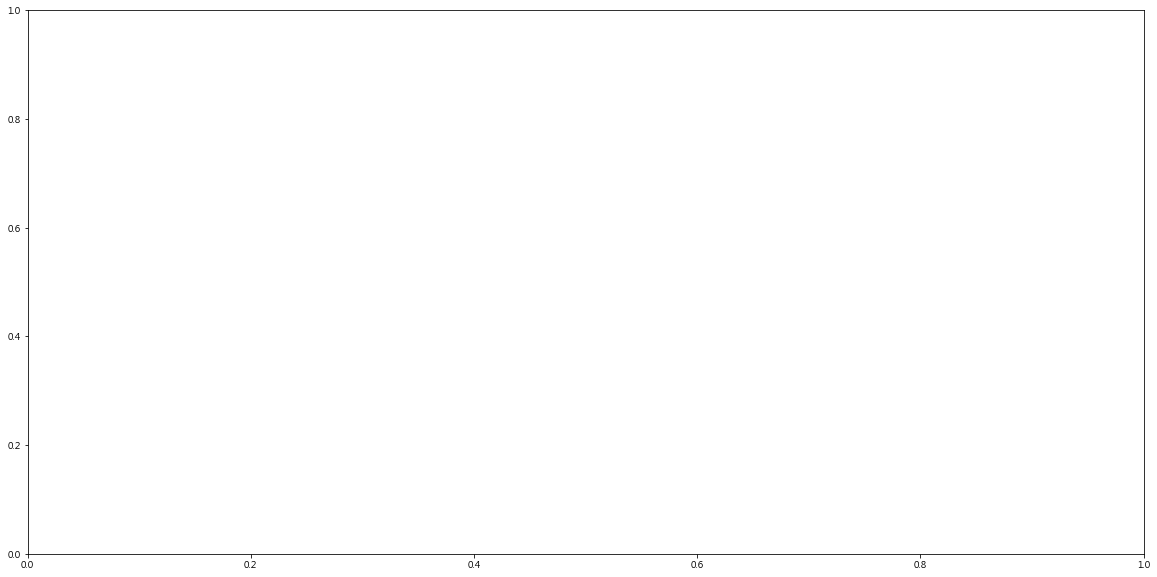

In [372]:
fig.clear('all')
fig, axes= plt.subplots(1)
fig.set_size_inches(20,10)

In [331]:
subwayy[subwayy['구분']=='승차'].iloc[:,2:].plot(ax= axes)

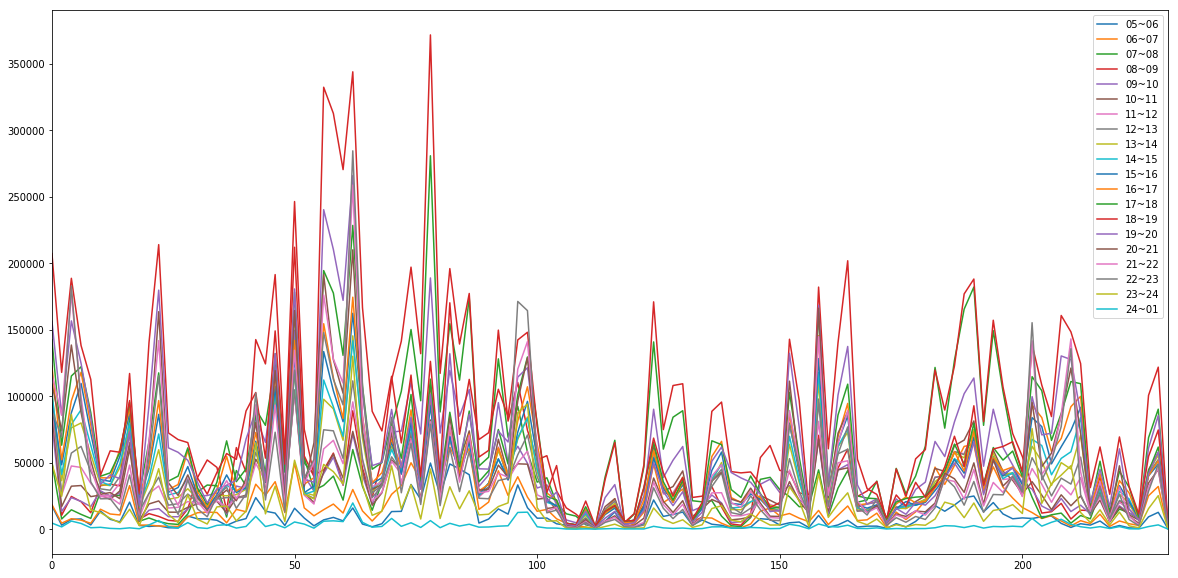

In [332]:
fig

In [388]:
# subTop10.set_index('전체')
subTop10.set_index('전체').iloc[:,1]

전체
강 남       2910770
잠 실       2491504
신 림       2317361
삼 성       2153134
강 변       1958187
고속터미      1919591
선 릉       1893532
서울역(1)    1830134
구로공단      1730707
신 촌       1710438
Name: 합, dtype: int64

In [395]:
subTop10.전체

62        강 남
50        잠 실
78        신 림
56        삼 성
46        강 변
158      고속터미
58        선 릉
0      서울역(1)
82       구로공단
98        신 촌
Name: 전체, dtype: object

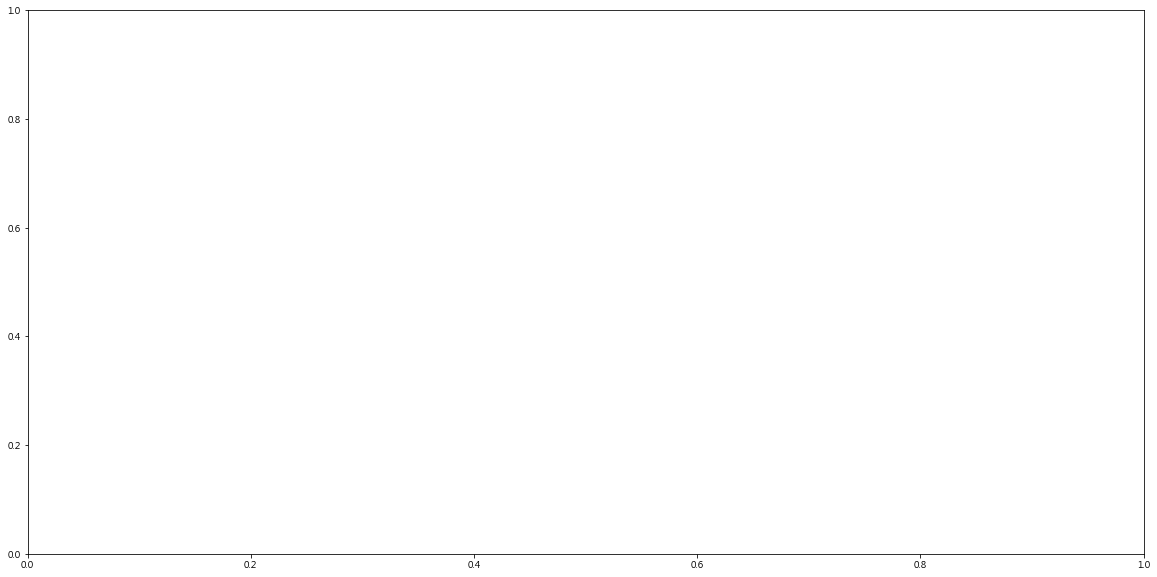

In [391]:
fig.clear('all')
fig, axes= plt.subplots(1)
fig.set_size_inches(20,10)

#### 이건 top10 역 승차수 비교 plot이고

In [392]:
subTop10.set_index('전체').iloc[:,1].plot(ax=axes)

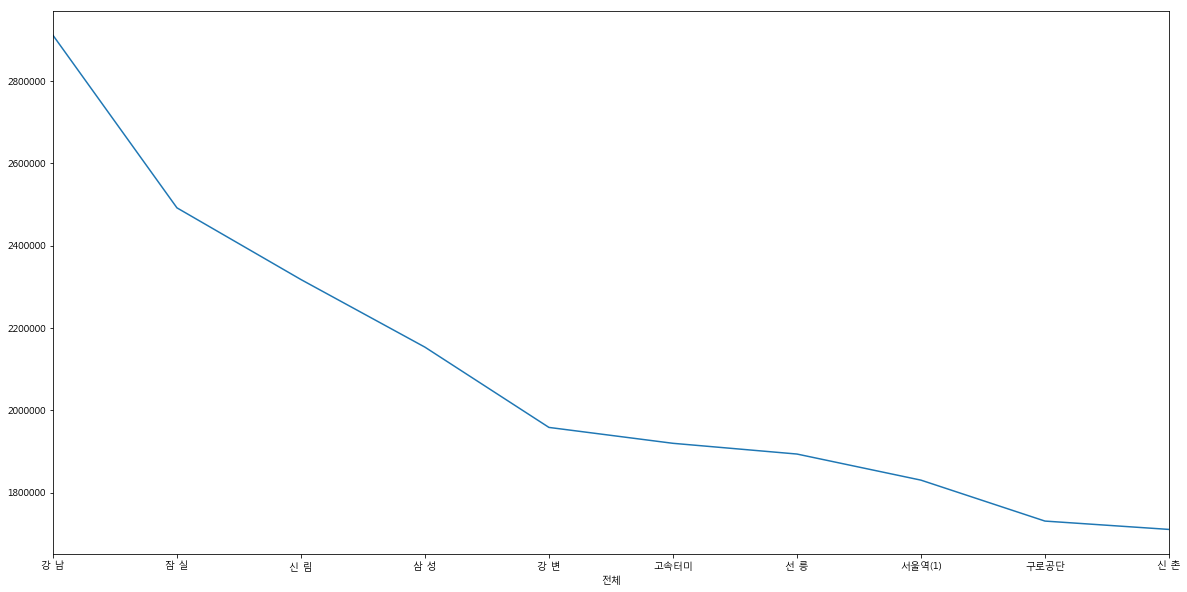

In [393]:
fig

In [362]:
subwayy_si.idxmax()

05~06    (신 림, 승차)
06~07    (신 림, 승차)
07~08    (신 림, 승차)
08~09    (역 삼, 하차)
09~10    (강 남, 하차)
10~11    (강 남, 하차)
11~12    (강 남, 하차)
12~13    (강 남, 하차)
13~14    (강 남, 하차)
14~15    (강 남, 하차)
15~16    (강 남, 승차)
16~17    (강 남, 승차)
17~18    (강 남, 승차)
18~19    (강 남, 승차)
19~20    (신 림, 하차)
20~21    (강 남, 승차)
21~22    (강 남, 승차)
22~23    (강 남, 승차)
23~24    (신 림, 하차)
24~01    (신도림, 하차)
dtype: object

In [367]:
subwayy.rank(ascending=False)['전체'].sort_values()

212      1.5
213      1.5
130      3.5
131      3.5
96       5.5
97       5.5
202      7.5
203      7.5
94       9.5
95       9.5
37      11.5
36      11.5
201     13.5
200     13.5
173     15.5
172     15.5
104     17.5
105     17.5
209     19.5
208     19.5
227     21.5
226     21.5
17      23.5
16      23.5
187     25.5
186     25.5
121     27.5
120     27.5
55      29.5
54      29.5
       ...  
231    203.5
230    203.5
162    205.5
163    205.5
72     207.5
73     207.5
197    209.5
196    209.5
148    211.5
149    211.5
123    213.5
122    213.5
83     215.5
82     215.5
44     217.5
45     217.5
160    219.5
161    219.5
64     221.5
65     221.5
159    223.5
158    223.5
137    225.5
136    225.5
42     227.5
43     227.5
47     229.5
46     229.5
62     231.5
63     231.5
Name: 전체, Length: 232, dtype: float64

In [343]:
print(subwayy[subwayy['구분']=='승차'].iloc[:,2:].T.shape)
print(subwayy['전체'].unique().shape)

(20, 116)
(116,)


In [344]:
subwayy['전체'].unique()

array(['서울역(1)', '시 청(1)', '종 각', '종로3(1)', '종로5가', '동대문', '신설동(1)', '제기동',
       '청량리', '동묘앞', '시 청(2)', '을지입구', '을지3(2)', '을지4가', '동운(2)', '신당',
       '상왕십리', '왕십리', '한양대', '뚝 섬', '성 수', '건 대', '구 의', '강 변', '성 내',
       '잠 실', '신 천', '종합운동', '삼 성', '선 릉', '역 삼', '강 남', '교대(2)', '서 초',
       '방 배', '사당(2)', '낙성대', '서울대', '봉 천', '신 림', '신대방', '구로공단', '대 림',
       '신도림', '문 래', '영등포구', '당 산', '합 정', '홍 대', '신 촌', '이 대', '아 현',
       '충정로', '용 답', '신 답', '신설동(2)', '도림천', '양천구청', '신정네거', '용두역', '지 축',
       '구파발', '연신내', '불 광', '녹 번', '홍 제', '무악재', '독립문', '경복궁', '안 국',
       '종로3(3)', '을지3(3)', '동 대', '약 수', '금 호', '옥 수', '압구정', '신 사', '잠 원',
       '고속터미', '교대(3)', '남부터미', '양 재', '매 봉', '도 곡', '대 치', '학여울', '대 청',
       '일 원', '수 서', '당고개', '상 계', '노 원', '창 동', '쌍 문', '수 유', '미 아',
       '미아3거', '길 음', '성신여대', '한성대', '혜 화', '동대문(4)', '동운(4)', '충무로',
       '명 동', '회 현', '서울역(4)', '숙 대', '삼각지', '신용산', '이 촌', '동 작', '총신대',
       '사당(4)', '남태령'], dtype=object)

In [360]:
subwayy[subwayy['구분']=='승차'].iloc[:,2:]

,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~01
0,17465,18434,50313,93398,78705,86342,93585,97707,102608,101710,93849,122597,142272,207172,156209,108909,116350,88902,49049,4558
2,2993,4473,7633,10404,13328,16953,25467,27265,36393,41128,48352,52182,63118,117857,85833,74034,85680,69327,24653,1691
4,7371,7836,14545,24578,23691,32290,47470,57187,76131,78721,87480,96491,115106,188578,156569,138406,176800,182774,86306,6074
6,7683,6733,11103,20647,20878,32775,46390,62213,79812,89760,109496,117960,122073,138037,124621,87746,99388,93874,43373,4284
8,3159,4416,8070,12328,16909,24445,34454,43485,56337,63083,72147,78378,87662,112569,83818,51502,46205,35584,14442,1047
10,13570,14955,28139,32650,28878,25619,25431,30289,33404,35811,37221,38553,39791,40490,33662,26227,24449,22797,12488,1378
12,7379,11384,24936,33848,24614,22337,25357,29247,32778,32837,35917,38590,42281,58866,40858,27493,24016,22953,8107,558
14,5432,10675,25372,32579,26940,28781,34569,39531,46276,49218,54800,60054,57702,57808,37894,22871,18794,13575,4752,301
16,20318,32688,83208,117006,75323,65009,70401,71667,78177,79725,87285,90482,95386,96655,73080,60459,48159,40716,14929,963
18,2779,3034,5963,7454,6531,6421,8773,13398,16461,17350,22413,26155,26026,26744,17938,10419,7783,6456,2630,313


In [358]:
print(subwayy[subwayy['구분']=='승차'].iloc[:,2:].T.shape)

(20, 116)


In [346]:
subwayyT= subwayy[subwayy['구분']=='승차'].iloc[:,2:].T

In [347]:
subwayyT.columns= subwayy['전체'].unique()

In [348]:
subwayyT

,서울역(1),시 청(1),종 각,종로3(1),종로5가,동대문,신설동(1),제기동,청량리,동묘앞,...,회 현,서울역(4),숙 대,삼각지,신용산,이 촌,동 작,총신대,사당(4),남태령
05~06,17465,2993,7371,7683,3159,13570,7379,5432,20318,2779,...,4074,3044,6120,842,2722,959,705,9235,12640,388
06~07,18434,4473,7836,6733,4416,14955,11384,10675,32688,3034,...,6357,4219,11212,2094,6150,4080,2780,25112,32077,878
07~08,50313,7633,14545,11103,8070,28139,24936,25372,83208,5963,...,10229,7803,27701,5724,15073,12302,7718,68737,90179,2127
08~09,93398,10404,24578,20647,12328,32650,33848,32579,117006,7454,...,14269,13936,39447,8746,20559,19053,12209,100562,121773,2921
09~10,78705,13328,23691,20878,16909,28878,24614,26940,75323,6531,...,18009,11492,26357,6646,17534,12055,9002,60950,85433,2280
10~11,86342,16953,32290,32775,24445,25619,22337,28781,65009,6421,...,24895,11342,21873,5414,16679,10731,6824,44741,57495,2116
11~12,93585,25467,47470,46390,34454,25431,25357,34569,70401,8773,...,38682,12434,24197,5875,20083,14924,8462,41607,52123,1928
12~13,97707,27265,57187,62213,43485,30289,29247,39531,71667,13398,...,54125,12329,26399,7871,21518,18583,7846,42023,52127,1941
13~14,102608,36393,76131,79812,56337,33404,32778,46276,78177,16461,...,70701,13101,31520,9804,26257,19485,6957,43037,55586,2078
14~15,101710,41128,78721,89760,63083,35811,32837,49218,79725,17350,...,83892,12113,29929,9216,28455,22668,7141,40587,51215,1843


In [354]:
plt.rc('font', family='Malgun Gothic')

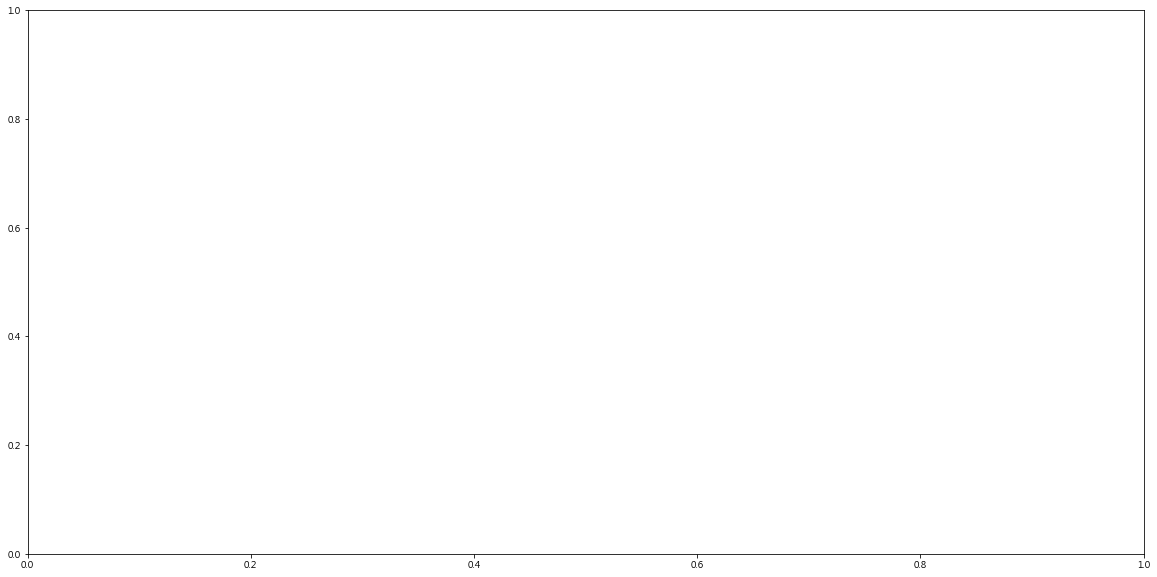

In [355]:
fig.clear('all')
fig, axes= plt.subplots(1)
fig.set_size_inches(20,10)

In [356]:
# subwayy[subwayy['구분']=='승차'].iloc[:,2:].T.plot(ax= axes)
subwayyT.plot(ax=axes)

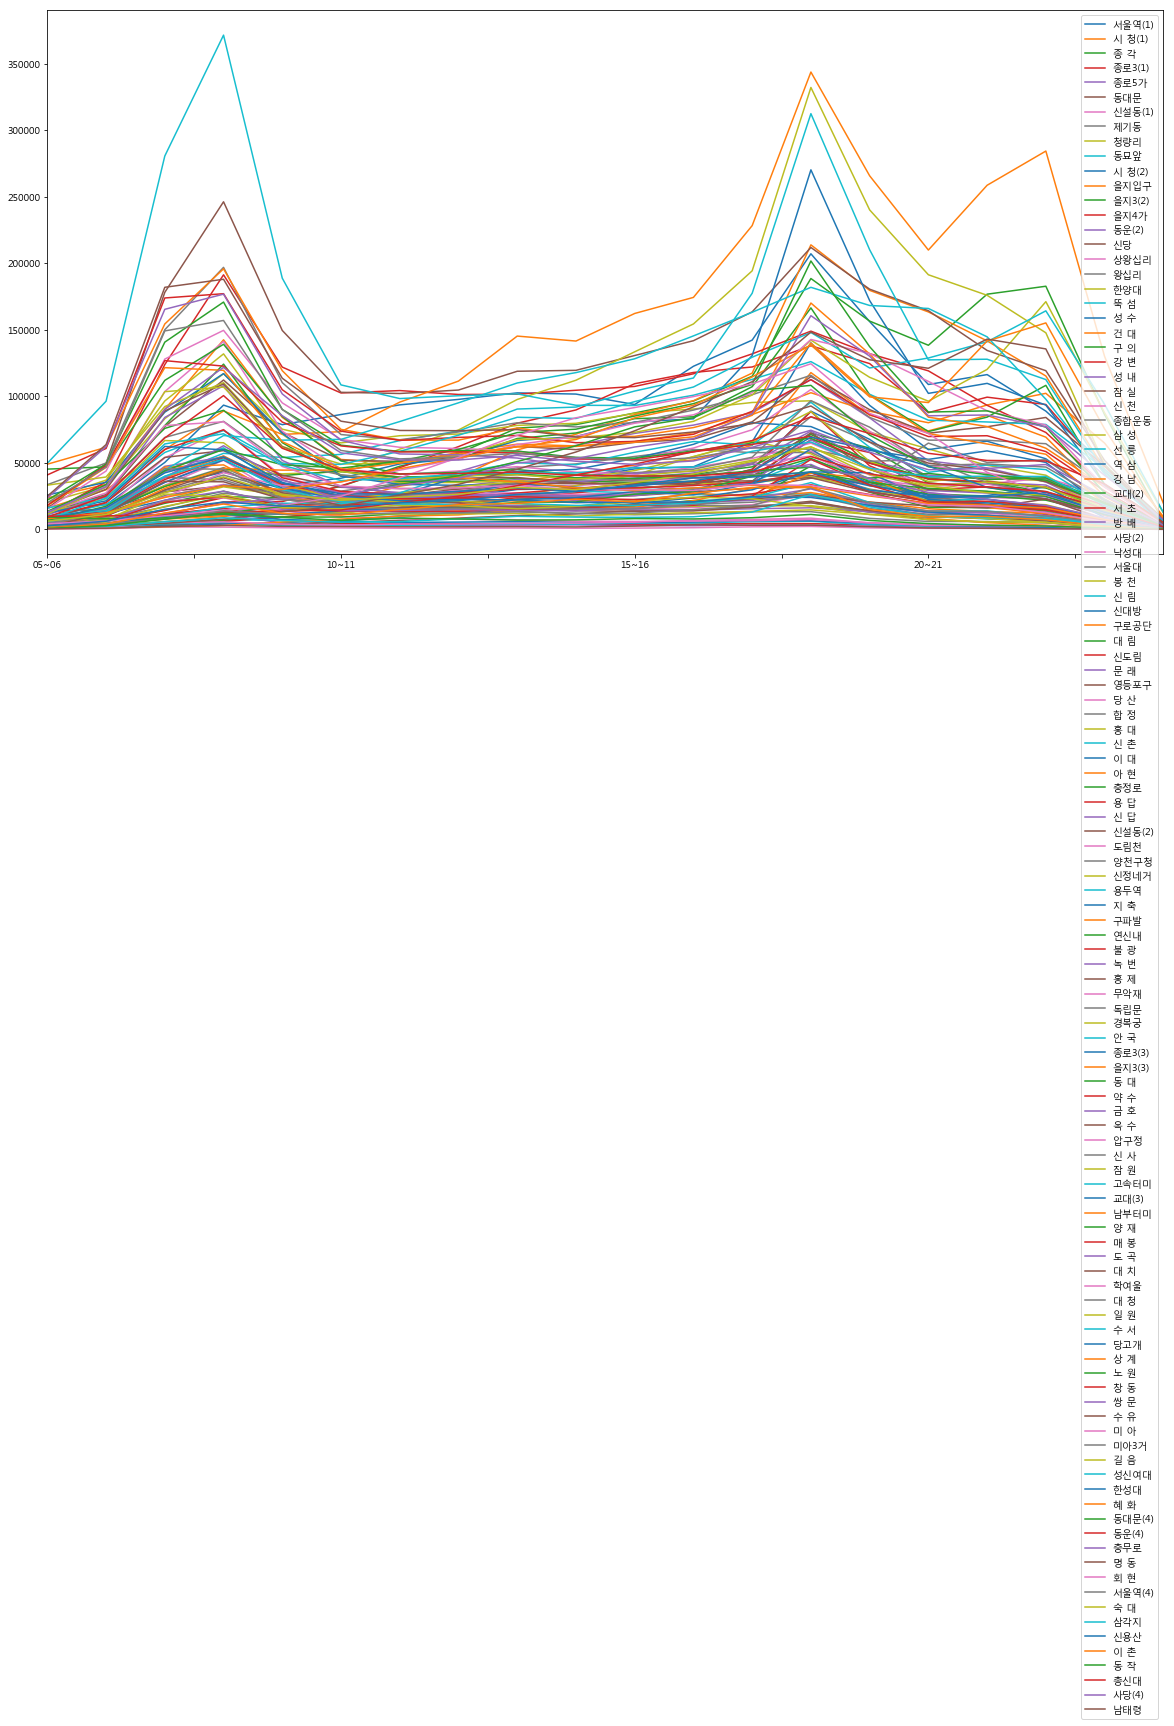

In [357]:
fig

#### 전체 다 말고 top10역만;;

In [402]:
from pandas import Series

In [405]:
top10sta= list(subTop10.전체)
top10sta

['강 남', '잠 실', '신 림', '삼 성', '강 변', '고속터미', '선 릉', '서울역(1)', '구로공단', '신 촌']

In [414]:
subwayyT[top10sta]

,강 남,잠 실,신 림,삼 성,강 변,고속터미,선 릉,서울역(1),구로공단,신 촌
05~06,15916,15702,49677,6961,12065,10312,8814,17465,48983,16080
06~07,29785,49582,96328,14629,35656,14066,18853,18434,61671,24059
07~08,59817,178192,280681,32889,123895,44545,39883,50313,154415,57826
08~09,88993,246272,371548,44500,191360,70532,57160,93398,195869,74313
09~10,71391,149538,188839,41747,121986,67071,54053,78705,119292,49514
10~11,73463,103022,108599,43256,102537,67651,56357,86342,75166,48844
11~12,95645,102144,98333,60301,104340,81048,66754,93585,67041,58666
12~13,111468,104737,100468,74698,101414,95133,73898,97707,67104,70790
13~14,145307,118859,101874,97641,101597,110046,90448,102608,76240,84257
14~15,141569,119566,93288,112105,104580,117845,91931,101710,69687,83375


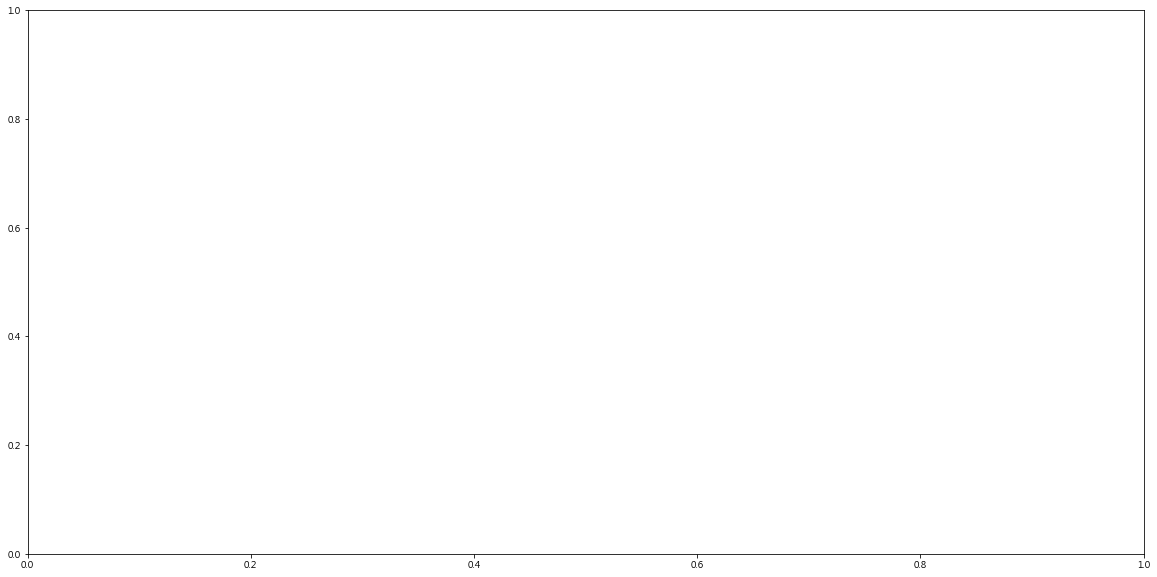

In [411]:
fig.clear('all')
fig, axes= plt.subplots(1)
fig.set_size_inches(20,10)

In [412]:
subwayyT[top10sta].plot(ax=axes)

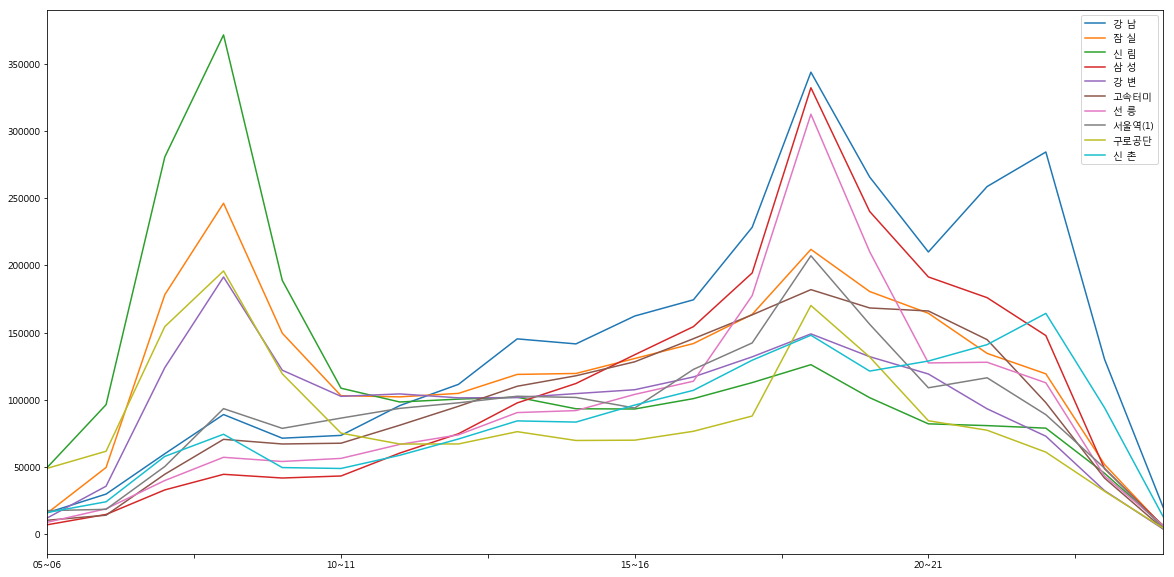

In [413]:
fig

### 5

In [420]:
subwayyT

,서울역(1),시 청(1),종 각,종로3(1),종로5가,동대문,신설동(1),제기동,청량리,동묘앞,...,회 현,서울역(4),숙 대,삼각지,신용산,이 촌,동 작,총신대,사당(4),남태령
05~06,17465,2993,7371,7683,3159,13570,7379,5432,20318,2779,...,4074,3044,6120,842,2722,959,705,9235,12640,388
06~07,18434,4473,7836,6733,4416,14955,11384,10675,32688,3034,...,6357,4219,11212,2094,6150,4080,2780,25112,32077,878
07~08,50313,7633,14545,11103,8070,28139,24936,25372,83208,5963,...,10229,7803,27701,5724,15073,12302,7718,68737,90179,2127
08~09,93398,10404,24578,20647,12328,32650,33848,32579,117006,7454,...,14269,13936,39447,8746,20559,19053,12209,100562,121773,2921
09~10,78705,13328,23691,20878,16909,28878,24614,26940,75323,6531,...,18009,11492,26357,6646,17534,12055,9002,60950,85433,2280
10~11,86342,16953,32290,32775,24445,25619,22337,28781,65009,6421,...,24895,11342,21873,5414,16679,10731,6824,44741,57495,2116
11~12,93585,25467,47470,46390,34454,25431,25357,34569,70401,8773,...,38682,12434,24197,5875,20083,14924,8462,41607,52123,1928
12~13,97707,27265,57187,62213,43485,30289,29247,39531,71667,13398,...,54125,12329,26399,7871,21518,18583,7846,42023,52127,1941
13~14,102608,36393,76131,79812,56337,33404,32778,46276,78177,16461,...,70701,13101,31520,9804,26257,19485,6957,43037,55586,2078
14~15,101710,41128,78721,89760,63083,35811,32837,49218,79725,17350,...,83892,12113,29929,9216,28455,22668,7141,40587,51215,1843


In [424]:
subwayyT.xs('05~06')

서울역(1)    17465
시 청(1)     2993
종 각        7371
종로3(1)     7683
종로5가       3159
동대문       13570
신설동(1)     7379
제기동        5432
청량리       20318
동묘앞        2779
시 청(2)     2035
을지입구       2466
을지3(2)     1029
을지4가        896
동운(2)      9832
신당         7779
상왕십리       7678
왕십리        6645
한양대        2840
뚝 섬        6004
성 수        7932
건 대       23676
구 의       13507
강 변       12065
성 내        2744
잠 실       15702
신 천        8315
종합운동       2496
삼 성        6961
선 릉        8814
          ...  
학여울         637
대 청        4103
일 원        1620
수 서        5811
당고개       12235
상 계       17690
노 원       13462
창 동       18142
쌍 문       23608
수 유       24880
미 아       12994
미아3거      19977
길 음       11443
성신여대       7795
한성대        8452
혜 화        8005
동대문(4)     9310
동운(4)      9842
충무로        4315
명 동        1299
회 현        4074
서울역(4)     3044
숙 대        6120
삼각지         842
신용산        2722
이 촌         959
동 작         705
총신대        9235
사당(4)     12640
남태령         388
Name: 05~06, Length: 116

In [425]:
subwayyT.xs('24~01')

서울역(1)    4558
시 청(1)    1691
종 각       6074
종로3(1)    4284
종로5가      1047
동대문       1378
신설동(1)     558
제기동        301
청량리        963
동묘앞        313
시 청(2)    3157
을지입구      6498
을지3(2)    1899
을지4가       857
동운(2)     4897
신당        1142
상왕십리       517
왕십리       2850
한양대       3371
뚝 섬        795
성 수       2034
건 대       9590
구 의       1950
강 변       3731
성 내       1026
잠 실       5392
신 천       3794
종합운동       749
삼 성       5959
선 릉       6250
          ... 
학여울        138
대 청        461
일 원        306
수 서        424
당고개        448
상 계       1037
노 원       2584
창 동       2362
쌍 문       1185
수 유       2634
미 아        805
미아3거      1998
길 음       1775
성신여대      2200
한성대       1788
혜 화       8099
동대문(4)    2278
동운(4)     5154
충무로       7417
명 동       3636
회 현       1823
서울역(4)     858
숙 대       1885
삼각지        492
신용산       1921
이 촌        253
동 작        160
총신대       1930
사당(4)     3197
남태령         51
Name: 24~01, Length: 116, dtype: int64